# Week 1



In [1]:
path = r"/content/drive/MyDrive/Colab Notebooks/Py GenDS/lambda_virus.fa"
seqs = {}
with open(path) as f:
  for line in f:
    if line[0]==">":
      curr_seq = line.split()[0].split("|")[-1]
      seqs[curr_seq]=""
    else:
      seqs[curr_seq] = seqs[curr_seq] + line[:-1]

In [2]:
seqs

{'': 'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGA

In [20]:
def naive_with_rc(p, t):
    occurrences = []
    p_rc = p
    for b, c in (('A','t'), ('T','a'), ('C', 'g'), ('G', 'c')):
      p_rc = p_rc.replace(b, c)
    for b, c in (('a','A'), ('t','T'), ('c', 'C'), ('g', 'G')):
      p_rc = p_rc.replace(b, c)
    p_rc = p_rc[::-1]
    print(p_rc)
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        for k in (p, p_rc):
          match = True
          for j in range(len(k)):  # loop over characters
              if t[i+j] != k[j]:  # compare characters
                  match = False
                  break
          if match:
              occurrences.append(i)  # all chars matched; record
    return list(set(occurrences))

In [26]:
p = 'AGTCGA'
t = seqs['']
occurrences = naive_with_rc(p, t)
print(occurrences)

TCGACT
[450, 44806, 41927, 2472, 45369, 1908, 18005, 23320, 33657]


In [20]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
          mm = 0
          for j in range(len(p)):  # loop over characters
              if t[i+j] != p[j]:  # compare characters
                  mm += 1
                  if mm>2:
                    break
          if mm<=2:
              occurrences.append(i)  # all chars matched; record
    return occurrences

In [47]:
p = 'AGGAGGTT'
t = seqs['']
occurrences = naive_2mm(p, t)
print(occurrences)

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

In [48]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [50]:
badreadwot = readFastq(r"/content/drive/MyDrive/Colab Notebooks/Py GenDS/ERR037900_1.first1000.fastq")

In [54]:
pos = {}
for read in badreadwot[1]:
  for i in range(len(read)):
    try:
      pos[i] = pos[i] + ord(read[i])
    except:
      pos[i] = ord(read[i])

#  Week 2

In [36]:
import sys
sys.path.append(r'/content/drive/MyDrive/Colab Notebooks/Py GenDS')
import bm_preproc

In [37]:
path = r"/content/drive/MyDrive/Colab Notebooks/Py GenDS/chr1.GRCh38.excerpt.fasta"
seqs = {}
with open(path) as f:
  for line in f:
    if line[0]==">":
      curr_seq = line.split()[0].split("|")[-1]
      seqs[curr_seq]=""
    else:
      seqs[curr_seq] = seqs[curr_seq] + line[:-1]

In [61]:
seqs

{'>CM000663.2_excerpt': 'TTGAATGCTGAAATCAGCAGGTAATATATGATAATAGAGAAAGCTATCCCGAAGGTGCATAGGTCAACAATACTTGAGCCTAACTCAGTAGATCCTAAAAGAAAGCAATTTTTGCTGCTAACCTAACATTTCACAATGTCTGGAGACATTTACAGTTCCCACAACCTATGGCAGTTACTGGCATCTACTAGAGGTCAGAGATGCTGGTAAATACTCTGTAATGAACAAGAAGCCCCCCATAGCAAATAAATACCCAGCCCAAGATGGCAATAGTGCCCAGATTGAGAAACTTCACCTTAACCTGATATCATGCAAATATATCTGAAGAAAGACACAAACATAACTAAAGAAAGATGATTACCAGAAGAGATATTCATAAATCTTAGAAGCATAGAAAAAGAAACACAAGGCAATGTTTTCAGTGTCCAGGCAATTATCTTCCTGGGAAAAGCTAGCCTACCAGACCAACATGACTTTTGCACCTTGCTGGCAACCATTCTACTCTTCTGAAGAAGGAGACATCATTTGGACTCTAAAATCCCTTTTTCTGATTTCATACTCATCAAGAAATCTATCCATTTGGCTTAGTTTGTAGCTTATGCTGAAAAACGTGACTTGAGATTTCCTTCACTTGGAAATTGAGATTGCTTAATGTAGATTGACATTCTCAACATTTGGACAATAGTGGGATCAATTATCTTAACTTGCAAAGCTGAAGATTATACCTCTGGGCAACAGTCAAATTACCAAGGTAAATGCTTAGTTGTAGTCAGCATGGGATGGTGTTGAACCACTAATTCCATTTTTTAAAGAGATATAGGGCTTTTCAGGTTCTCTTTTTCTTCTTGAGTGAGCTTAAGTAGTTTGTTTCTTTCAAGGAATTAAACTATTTCATATAAGGTGTCACATTTATTGGCATAAGCTTGTTCAAAATATTTCTTATTATCCTAATATCTGTAGATTTTGTAATGATAT

In [64]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [67]:
def naive_with_counts(p, t):
    occurrences = []
    num_alignments = 0
    num_character_comparisons = 0
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        num_alignments += 1
        match = True
        for j in range(len(p)):  # loop over characters
            num_character_comparisons += 1
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences, num_alignments, num_character_comparisons

In [74]:
def bm_with_counts(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    num_alignments = 0
    num_character_comparisons = 0
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        num_alignments += 1
        for j in range(len(p)-1, -1, -1):
            num_character_comparisons += 1
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences, num_alignments, num_character_comparisons

In [79]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
t = seqs['>CM000663.2_excerpt']
occurrences, num_alignments, num_character_comparisons = naive_with_counts(p, t)
print(occurrences, num_alignments, num_character_comparisons)

[56922] 799954 984143


In [82]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
t = seqs['>CM000663.2_excerpt']
lowercase_alphabet = 'ACTG'
p_bm = bm_preproc.BoyerMoore(p, lowercase_alphabet)
occurrences, num_alignments, num_character_comparisons = bm_with_counts(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[56922] 127974 165191


In [52]:
import bisect
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer
    
    def query(self, p, max_mm=0):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            mm = 0
            flag = False
            for kk in range(self.k):
              if self.index[i][0][kk] != kmer[kk]:
                  mm += 1
              if mm > max_mm:
                flag = True
            if flag:
              break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [66]:
t = seqs['>CM000663.2_excerpt']
p='GGCGCGGTGGCTCACGCCTGTAAT'
ind = Index(t, 8)

In [67]:
len(ind.query(p, max_mm=2))

14

In [63]:
len(naive_2mm(p, t))

19

In [65]:
p_bm = bm_preproc.BoyerMoore(p, 'ACTG')
occurrences = boyer_moore(p, p_bm, t)
len(occurrences)

5

# Week 3

In [1]:
import numpy as np

## Edit distance

In [19]:
x = 'GCGTATGC'
y = 'GCTATAC'
def editDist(x, y):
  D = np.zeros((len(x) + 1, len(y) + 1))
  for i in range(len(x) + 1):
    D[i,0] = i
  for i in range(len(y) + 1):
    D[0,i] = i
  for j in range(1, len(x) + 1):
    for i in range(1, len(y) + 1):
      dh = D[j, i-1] + 1
      dv = D[j-1, i] + 1
      delta = 0 if x[j-1] == y[i-1] else 1
      dd = D[j-1, i-1] + delta
      D[j, i] = min(dh, dv, dd)
  return D[-1,-1]
editDist(x,y)

2.0

In [41]:
t = seqs['>CM000663.2_excerpt']
p = 'GATTTACCAGATTGAG'
D = np.zeros((len(p) + 1, len(t) + 1))
for i in range(len(p) + 1):
  D[i,0] = i
for i in range(len(t) + 1):
  D[0,i] = 0
for j in range(1, len(p) + 1):
  for i in range(1, len(t) + 1):
    dh = D[j, i-1] + 1
    dv = D[j-1, i] + 1
    delta = 0 if p[j-1] == t[i-1] else 1
    dd = D[j-1, i-1] + delta
    D[j, i] = min(dh, dv, dd)
min(D[-1])

2.0

In [31]:
t = 'TATGTCATGC'
p = 'TACGTCAGC'
alphabet = ['A', 'C', 'G', 'T']
scores = np.array([
          [0, 4, 2, 4, 8], 
          [4, 0, 4, 2, 8],
          [2, 4, 0, 4, 8],
          [4, 2, 4, 0, 8],
          [8, 8, 8, 8, 8]
          ])
D = np.zeros((len(p) + 1, len(t) + 1))
for i in range(1, len(p) + 1):
  D[i,0] = D[i-1, 0] + scores[alphabet.index(p[i-1]), -1]
for i in range(1, len(t) + 1):
  D[0,i] = D[0, i-1] + scores[-1, alphabet.index(t[i-1])]
for j in range(1, len(p) + 1):
  for i in range(1, len(t) + 1):
    dh = D[j, i-1] + scores[-1, alphabet.index(t[i-1])]
    dv = D[j-1, i] + scores[alphabet.index(p[j-1]), -1]
    dd = D[j-1, i-1] + scores[alphabet.index(p[j-1]), alphabet.index(t[i-1])]
    D[j, i] = min(dh, dv, dd)
print(np.matrix(D))

[[ 0.  8. 16. 24. 32. 40. 48. 56. 64. 72. 80.]
 [ 8.  0.  8. 16. 24. 32. 40. 48. 56. 64. 72.]
 [16.  8.  0.  8. 16. 24. 32. 40. 48. 56. 64.]
 [24. 16.  8.  2. 10. 18. 24. 32. 40. 48. 56.]
 [32. 24. 16. 10.  2. 10. 18. 26. 34. 40. 48.]
 [40. 32. 24. 16. 10.  2. 10. 18. 26. 34. 42.]
 [48. 40. 32. 24. 18. 10.  2. 10. 18. 26. 34.]
 [56. 48. 40. 32. 26. 18. 10.  2. 10. 18. 26.]
 [64. 56. 48. 40. 32. 26. 18. 10.  6. 10. 18.]
 [72. 64. 56. 48. 40. 34. 26. 18. 12. 10. 10.]]


In [42]:
def overlap(a, b, min_length = 3):
  start = 0
  while True:
    start = a.find(b[:min_length], start)
    if start == -1:
      return 0
    if b.startswith(a[start:]):
      return len(a) - start
    start += 1

In [33]:
overlap('TTACGT', 'CGTACCGT')

3

In [118]:
path = r"/content/drive/MyDrive/Colab Notebooks/Py GenDS/ERR266411_1.for_asm.fastq"
reads = []
with open(path) as f:
  i = 0
  for line in f:
    i += 1
    if i%4==1:
      reads.append(f.readline()[:-1])
    else:
      f.readline()
reads = set(reads)

In [166]:
from itertools import permutations
def overlap_map(reads, k):
  k_mers = {}
  for read in reads:
    for i in range(len(read)+1-k):
      k_mer = read[i:i+k]
      try:
        k_mers[k_mer] = k_mers[k_mer] | set([read])
      except:
        k_mers[k_mer] = set([read])  
  olaps = {}
  for a, b in permutations(reads, 2):
    a_ksuffix = a[-k:]
    if b in k_mers[a[-k:]]:
      olen = overlap(a, b, min_length=k)
      if olen >= k:
        olaps[(a, b)] = olen
  return olaps

In [114]:
reads = ['AATG']
k_mers = {}
k = 3
for read in reads:
  for i in range(len(read)+ 1 -k):
    k_mer = read[i:i+k]
    try:
      k_mers[k_mer] = k_mers[k_mer] | set([read])
    except:
      k_mers[k_mer] = set([read])  

In [197]:
olm = overlap_map(reads, 30)

In [202]:
ols = []
for a, b in olm.keys():
  ols.append(a)
len(set(ols))

3339

In [187]:
import matplotlib.pyplot as plt

(array([6798., 6680., 6530., 6370., 6205., 6080., 6023., 5843., 5597.,
        5546., 5475., 5274., 5132., 5161., 5009., 4842., 4841., 4695.,
        4442., 4446., 4359., 4095., 4023., 3974., 3773., 3750., 3619.,
        3556., 3459., 3347., 3370., 3191., 3243., 3122., 2953., 2881.,
        2858., 2747., 2656., 2643., 2601., 2397., 2421., 2307., 2267.,
        2169., 2124., 2048., 1950., 1877., 1812., 1702., 1744., 1613.,
        1546., 1492., 1414., 1348., 1274., 1163., 1111., 1041., 1063.,
         968.,  910.,  865.,  739.,  756.,  649.,  547.]),
 array([30.        , 30.98571429, 31.97142857, 32.95714286, 33.94285714,
        34.92857143, 35.91428571, 36.9       , 37.88571429, 38.87142857,
        39.85714286, 40.84285714, 41.82857143, 42.81428571, 43.8       ,
        44.78571429, 45.77142857, 46.75714286, 47.74285714, 48.72857143,
        49.71428571, 50.7       , 51.68571429, 52.67142857, 53.65714286,
        54.64285714, 55.62857143, 56.61428571, 57.6       , 58.58571429,
      

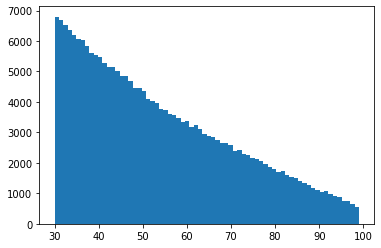

In [195]:
vals = []
for value in olm.values():
  vals.append(value)
plt.hist(vals, bins = max(vals)-min(vals) + 1)